In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('gsearch_jobs.csv')

In [3]:
df_nondupe = df.drop_duplicates(subset=['title', 'company_name', 'location', 'description'])
print('There are', len(df_nondupe), 'non-duplicate job postings.')
non_empty_count = df['salary_standardized'].notnull() & (df['salary_standardized'] != '')
non_empty_count = non_empty_count.sum()
print('In which there are', non_empty_count, 'postings with non-empty salary attribute.')

There are 41379 non-duplicate job postings.
In which there are 9125 postings with non-empty salary attribute.


In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [5]:
companies = pd.read_csv('companies.csv')
industries = pd.read_csv('industries.csv')
company_industries = pd.read_csv('company_industries.csv')
employee_counts = pd.read_csv('employee_counts.csv')

In [6]:
companies.columns

Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url'],
      dtype='object')

In [7]:
df_merged = pd.merge(df_nondupe, companies, left_on='company_name', right_on='name', how='left')
df_merged['company_id'] = df_merged['company_id'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
df_merged = pd.merge(df_merged, company_industries, on='company_id', how='left')

In [8]:
df_merged.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description_x', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens',
       'company_id', 'name', 'description_y', 'company_size', 'state',
       'country', 'city', 'zip_code', 'address', 'url', 'industry'],
      dtype='object')

In [9]:
non_empty_count = df_merged['company_id'].notnull() & (df_merged['company_id'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with the basic information of company.')
non_empty_count = df_merged['industry'].notnull() & (df_merged['industry'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with the industry information of company.')

There are 18366 out of 41622 job postings with the basic information of company.
There are 18282 out of 41622 job postings with the industry information of company.


In [10]:
non_empty_count = df_merged['description_x'].notnull() & (df_merged['description_x'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with non-empty job description.')

There are 41622 out of 41622 job postings with non-empty job description.


In [11]:
df_merged[['salary_avg', 'salary_min', 'salary_max', 'salary_standardized']].describe()

,salary_avg,salary_min,salary_max,salary_standardized
count,7219.000000,6784.000000,6784.000000,7219.000000
mean,38586.166635,31738.035532,45660.626813,93330.627012
std,54087.512181,44596.600013,64606.184630,43412.035112
min,7.250000,8.000000,10.000000,15080.000000
25%,32.490000,18.460000,45.000000,62770.600000
50%,57.500000,45.000000,75.000000,88743.200000
75%,86875.000000,72363.250000,100000.000000,119050.400000
max,434500.000000,275000.000000,850000.000000,624000.000000


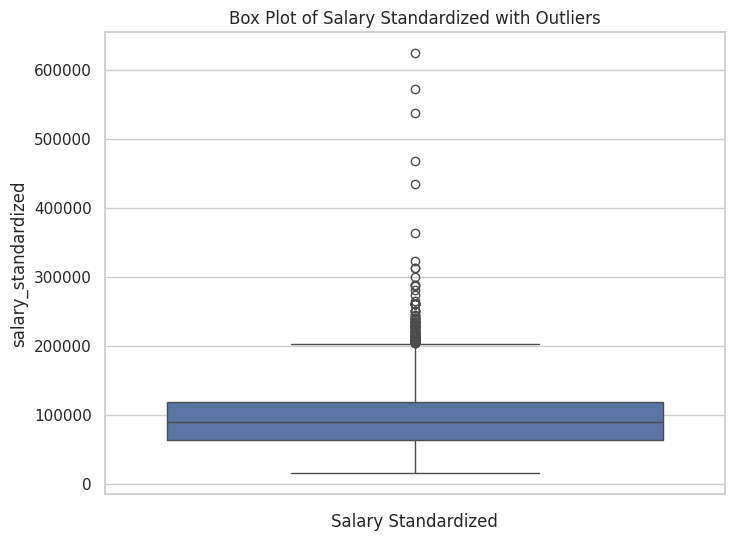

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_merged['salary_standardized'])
plt.xlabel('Salary Standardized')
plt.title('Box Plot of Salary Standardized with Outliers')
plt.show()

In [13]:
average_length = df_merged['description_x'].str.len().mean()
print(f'Average length of job descriptions: {average_length}')

Average length of job descriptions: 3332.8842679352265


In [14]:
def extract_experience(description):
    # Regex to find patterns like 'X years', 'X+ years', 'X years experience'
    pattern = r'(\d+)\s*[-+]?[\s]*years?[\s]*(?:of\s*experience)?'
    match = re.search(pattern, description, re.IGNORECASE)
    if match:
        return int(match.group(1))  # Return the first capturing group as an integer
    return None  # Return None if no match is found

# Apply the function to extract years of experience
df_merged['Years_of_Experience'] = df_merged['description_x'].apply(extract_experience)

In [15]:
non_empty_count = df_merged['Years_of_Experience'].notnull() & (df_merged['Years_of_Experience'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with Years_of_Experience in job description.')

There are 24478 out of 41622 job postings with Years_of_Experience in job description.


In [16]:
correlation = df_merged[['Years_of_Experience', 'salary_standardized']].dropna().corr().iloc[0, 1]
print(f'Correlation between salary and YOE: {correlation}')

Correlation between salary and YOE: -0.013471917658223132


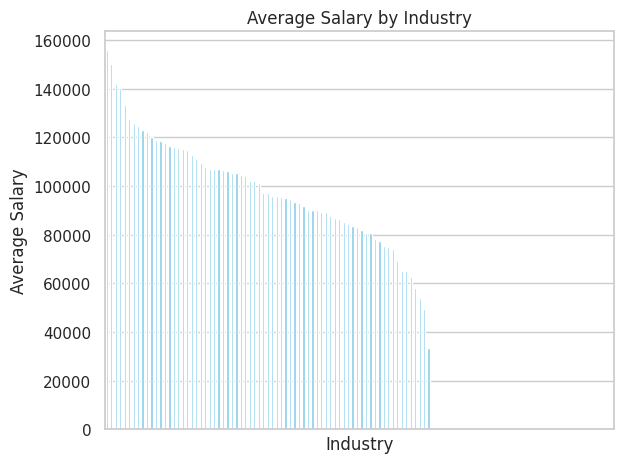

In [17]:
average_salary = df_merged.groupby('industry')['salary_standardized'].mean()
average_salary_sorted = average_salary.sort_values(ascending=False)
average_salary_sorted.plot(kind='bar', color='skyblue')

plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salary by Industry')
plt.xticks([])
plt.tight_layout()

plt.show()